# Image Filters and Blurring
## Lesson 1: Image Filters and Blurring
Learning Objective:

Understand how image filtering works using convolution and built-in OpenCV blurring methods.

Topics:

● What is an image filter?

● Gaussian Blur

● Median Blur

● Bilateral Filter

In [ ]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('images/sample.jpg')

# Apply Gaussian Blur
gaussian = cv2.GaussianBlur(img, (15, 15), 0)

# Apply Median Blur
median = cv2.medianBlur(img, 15)

# Apply Bilateral Filter
bilateral = cv2.bilateralFilter(img, 15, 75, 75)

cv2.imshow("Gaussian Blur", gaussian)
cv2.imshow("Median Blur", median)
cv2.imshow("Bilateral Filter", bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 1: Completed in task1.py file

## Lesson 2: Custom Image Filters with Kernels
Learning Objective:

Learn to apply custom filters like sharpening and edge detection using convolution kernels.

Topics:

● Convolution basics

● cv2.filter2D

● Sharpening kernel

● Edge detection kernel

In [3]:
img = cv2.imread("images/sample.jpg")

# Sharpening kernel
kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5,-1],
                            [0, -1, 0]])

# Edge Detection Kernel
kernel_edge = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpen)
edges = cv2.filter2D(img, -1, kernel_edge)

cv2.imshow("Sharpened Image", sharpened)
cv2.imshow("Edge Detected Image", edges)
cv2.imshow("Original Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 2: Completed in task2.py file

## Lesson 3: Image Arithmetic & Bitwise Operations
Learning Objective:

Understand how to blend images and use bitwise operations for masking.
### Topics:
● Image addition and blending

● Bitwise AND, OR, NOT operations

● Creating masks

In [3]:
img1 = cv2.imread("images/sample.jpg")
img2 = cv2.imread("images/logo.jpg")

# Resize img2 to match img1
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
# Blend the two
blended = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
cv2.imshow('Blended', blended)

cv2.imshow("Image 1", img1)
cv2.imshow("Image 2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img1 = cv2.imread("images/sample.jpg")

mask = np.zeros(img1.shape[:2], dtype="uint8")
cv2.rectangle(mask, (300, 20), (400, 150), 255, -1)

masked = cv2.bitwise_and(img1, img1, mask=mask)

cv2.imshow("Masked Region", masked)
cv2.waitKey(0)
cv2.destroyAllWindows() 

### Task 3: Completed in task3.py file

## Lesson 4: Perspective and Affine Transformations
Learning Objective:

Understand how to manipulate the orientation and shape of images using geometric transforms
## Topics:
● Difference between Affine and Perspective transforms

● cv2.getAffineTransform() and cv2.warpAffine()

● cv2.getPerspectiveTransform() and cv2.warpPerspective()

In [ ]:
# Affine Transform
img = cv2.imread('images/sample.jpg')

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

matrix = cv2.getAffineTransform(pts1, pts2)

result = cv2.warpAffine(img, matrix, (img.shape[1], img.shape[0]))

cv2.imshow("Affine Transform", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
# Perspective Transform

img = cv2.imread('images/documents.jpg')


pts1 = np.float32([[21,54], [157, 42], [6, 225], [185, 225]])
pts2 = np.float32([[0, 0], [200, 0], [0, 230], [200, 230]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, matrix, (img.shape[1], img.shape[0]))

cv2.imshow("Original", img)
cv2.imshow("Perspective Transform", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 4: Completed in task4.py file

## Lesson 5: Image Pyramids & Zooming
Learning Objective:

Use pyramids to create scaled versions of an image for zoom effects and 

multiscale analysis.
### Topics:
● Gaussian pyramid (downsampling)

● Laplacian pyramid (edge emphasis)

● cv2.pyrDown() and cv2.pyrUp()


In [ ]:
img = cv2.imread("images/sample.jpg")

lower_reso = cv2.pyrDown(img)
higher_reso = cv2.pyrUp(lower_reso)

cv2.imshow("Original Image", img)
cv2.imshow("Downsampled", lower_reso)
cv2.imshow("Upsampled", higher_reso)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Task 5: Completed in task5.py file

## Lesson 6: Trackbars for Real-Time Parameters
Learning Objective:

Use OpenCV GUI elements to adjust image processing parameters in real-time.
### Topics:
● cv2.createTrackbar()

● Real-time Canny thresholding

● Custom filters with trackbars

In [ ]:
img = cv2.imread("images/sample.jpg", 0)

def nothing(x):
    pass

cv2.namedWindow("Canny")
# Create trackbars for thresholds
cv2.createTrackbar("Min", "Canny", 0, 255, nothing)
cv2.createTrackbar("Max", "Canny", 0, 255, nothing)

while True:
    min_val = cv2.getTrackbarPos("Min", "Canny")
    max_val = cv2.getTrackbarPos("Max", "Canny")
    edges = cv2.Canny(img, min_val, max_val)
    cv2.imshow("Canny", edges)
    if cv2.waitKey(1) & 0xFF == 27:  # ESC key
        break

cv2.destroyAllWindows()

### Task 6: Completed in task6.py file

## Lesson 7: Image Histograms & Contrast Enhancement
### Learning Objective:
Understand image histograms and apply techniques like histogram equalization to improve
contrast.
## Topics:
● Histogram plotting with cv2.calcHist()

● Histogram equalization with cv2.equalizeHist()

● CLAHE (Contrast Limited Adaptive Histogram Equalization)


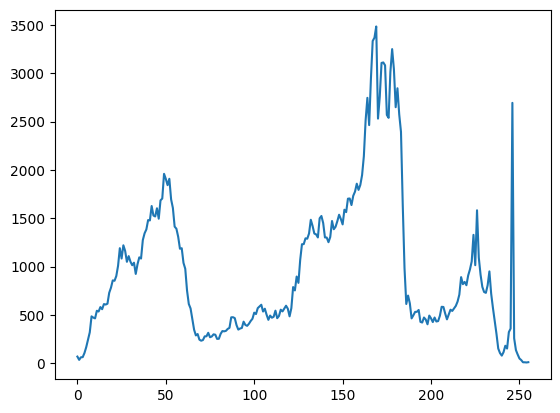

In [12]:
import matplotlib.pyplot as plt

img = cv2.imread("images/sample.jpg", 0)

# Plot histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

# # Equalize
equalized = cv2.equalizeHist(img)

cv2.imshow("Original", img)
cv2.imshow("Equalized", equalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 7: Completed in task7.py file

## Lesson 8: Morphological Transformations
### Learning Objective:
Learn to apply operations like erosion, dilation, opening, and closing to clean up binary images.
### Topics:
● Erosion and Dilation

● Opening and Closing

● cv2.getStructuringElement()


In [13]:

img = cv2.imread('images/binary.jpg', 0)
img = cv2.resize(img, (400, 400))
kernel = np.ones((5, 5), np.uint8)


erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow("Original", img)
cv2.imshow("Erosion", erosion)
cv2.imshow("Dilation", dilation)
cv2.imshow("Opening", opening)
cv2.imshow("Closing", closing)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Task 8: Completed in task8.py file

## Lesson 9: Template Matching
### Learning Objective:
Detect smaller objects or logos inside an image using template matching.
### Topics:
● cv2.matchTemplate()

● cv2.minMaxLoc()


In [29]:
img = cv2.imread("images/sample.jpg")
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread("images/logo.jpg")
gry1 = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

res = cv2.matchTemplate(gry, gry1, cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

(h, w) = gry1.shape[:2]
cv2.rectangle(img, max_loc, (max_loc[0] + w, max_loc[1] + h), (0, 255, 0), 2)

cv2.imshow("Detected", img)
cv2.imshow("Template", template)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Task 9: Completed in task9.py file

In [38]:
img = cv2.imread("images\shape.jpg")
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

r,thr = cv2.threshold(gry, 250,255, cv2.THRESH_BINARY)
c, h = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

new_img = cv2.drawContours(img, c, -1, (255,0,0),2)

cv2.imshow("New Image", new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
